In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
import mplhep as hep
utilities.set_plot_style()

In [2]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
sample_name = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6"
sample_file = f"{sample_dir}/{sample_name}_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root"

events = NanoEventsFactory.from_root(
    sample_file,
    treepath='ffNtuplizer/ffNtuple',
    schemaclass=ffschema.FFSchema,
    metadata = {
        "dataset": sample_name, 
    },
).events()

In [3]:
p = sidm_processor.SidmProcessor(
    [
        "4mu",
        "2mu2e",
    ],
    ["base"]
)
out = p.process(events)

In [4]:
out

{'SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6': {'cutflow': {'4mu': <analysis.tools.cutflow.Cutflow at 0x7f0463f82070>,
   '2mu2e': <analysis.tools.cutflow.Cutflow at 0x7f0463fb4e80>},
  'hists': {'pv_n': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel'),
     Regular(50, 0, 100, name='pv_n'),
     storage=Weight()) # Sum: WeightedSum(value=1914, variance=3022.89),
   'pv_ndof': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel'),
     Regular(25, 0, 100, name='pv_ndof'),
     storage=Weight()) # Sum: WeightedSum(value=46192.8, variance=74616.2) (WeightedSum(value=49863.5, variance=80906.5) with flow),
   'pv_z': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel'),
     Regular(100, -50, 50, name='pv_z'),
     storage=Weight()) # Sum: WeightedSum(value=49863.5, variance=80906.5),
   'pv_rho': Hist(
     StrCategory(['4mu', '2mu2e'], name='channel'),
     Regular(100, -0.5, 0.5, name='pv_rho'),
     storage=Weight()) # Sum: WeightedSum(value=49863.5, variance=80906.5),
 

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0463fe5bb0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

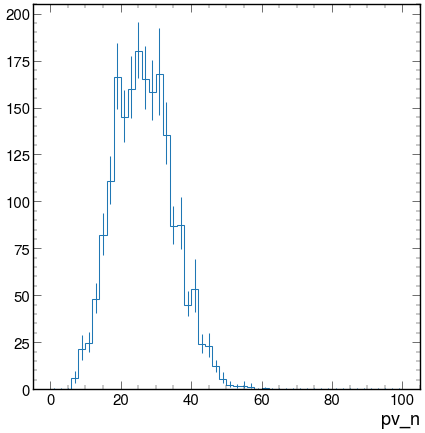

In [5]:
hep.histplot(out[sample_name]["hists"]["pv_n"]["2mu2e",:])

In [6]:
out[sample_name]["cutflow"]["2mu2e"].print_table()
print()
out[sample_name]["cutflow"]["2mu2e"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1914.4       1914.4
2mu2e                     1913.5       1913.5

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3041.0       3041.0
2mu2e                     3036.0       3036.0


In [7]:
out[sample_name]["cutflow"]["2mu2e"].print_table(fraction=True)
print()
out[sample_name]["cutflow"]["2mu2e"].print_table(fraction=True, unweighted=True)

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 16.6          16.6            16.6
2mu2e                   16.6         100.0            16.6

cut name        individual %    marginal %    cumulative %
------------  --------------  ------------  --------------
No selection           100.0         100.0           100.0
PV filter              100.0         100.0           100.0
Cosmic veto            100.0         100.0           100.0
>=2 LJs                 16.6          16.6            16.6
2mu2e                   16.5          99.8            16.5


In [8]:
out[sample_name]["cutflow"]["4mu"].print_table()
out[sample_name]["cutflow"]["4mu"].print_table(unweighted=True)

cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             11518.1      11518.1
PV filter                11518.1      11518.1
Cosmic veto              11518.1      11518.1
>=2 LJs                   1914.4       1914.4
4mu                          0.5          0.5
cut name        individual cut N    all cut N
------------  ------------------  -----------
No selection             18359.0      18359.0
PV filter                18359.0      18359.0
Cosmic veto              18359.0      18359.0
>=2 LJs                   3041.0       3041.0
4mu                          2.0          2.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f0462923d90>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

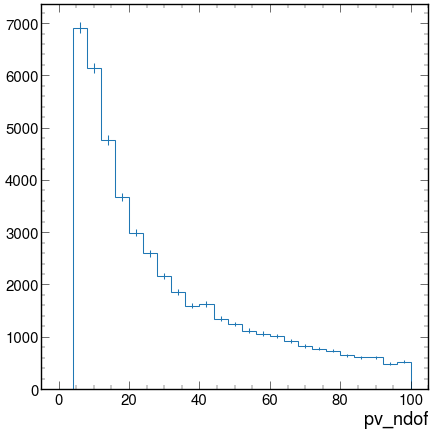

In [9]:
out[sample_name]["hists"]["pv_ndof"]["2mu2e", :].plot1d()

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f0462936040>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f04780bb250>, text=[])

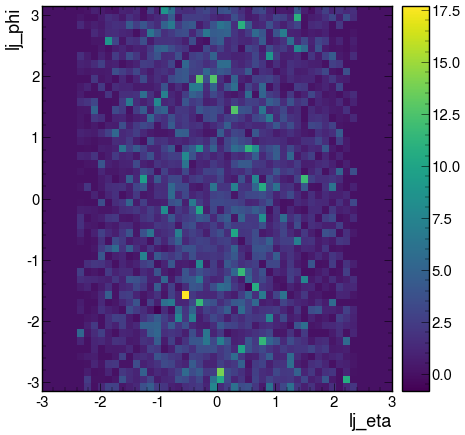

In [10]:
hep.hist2dplot(out[sample_name]["hists"]["lj_eta_phi"]["2mu2e", :, :])

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f04626484f0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

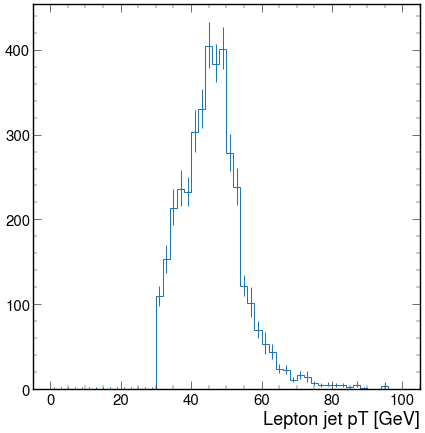

In [11]:
hep.histplot(out[sample_name]["hists"]["lj_pt"]["2mu2e", ::2j])

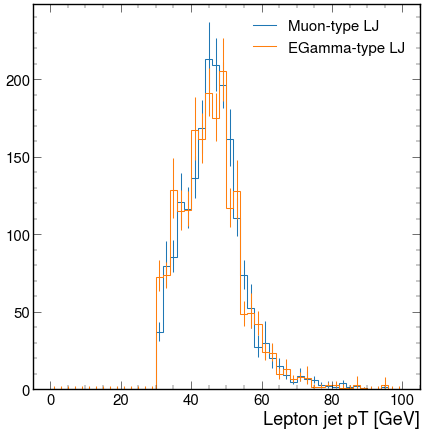

In [12]:
hep.histplot(out[sample_name]["hists"]["mu_lj_pt"]["2mu2e", ::2j])
hep.histplot(out[sample_name]["hists"]["egm_lj_pt"]["2mu2e", ::2j])
plt.legend(["Muon-type LJ", "EGamma-type LJ"])
plt.show()

In [13]:
ljs = events.ljsource
#ljs = ak.mask(ljs, ak.num(ljs) >= 2)
ljs = ljs[ak.argsort(ljs.p4.pt, ascending=False)]
ljs.p4.pt[ak.num(ljs) >= 2, 1]
print(ak.num(ljs.p4.pt))
print(ljs.p4.pt)
print(events.weightProduct)

[2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 0, 2, 3, ... 0, 2, 2, 2, 3, 2, 2, 1, 1, 1, 3, 3, 1]
[[29.1, 13.4], [35.6], [11.7, 6.41], ... 18.9, 10.5], [72.5, 21.6, 16.9], [31.6]]
[0.0612, 0.373, 4.88, 0.979, 0.922, 0.0589, ... 0.14, 1.12, 0.542, 0.176, 4, 0.0781]


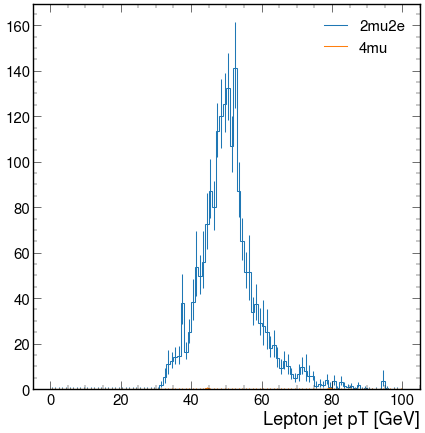

In [14]:
channels = ["2mu2e", "4mu"]
hep.histplot([out[sample_name]["hists"]["lj0_pt"][ch, :] for ch in channels])
plt.legend(channels)

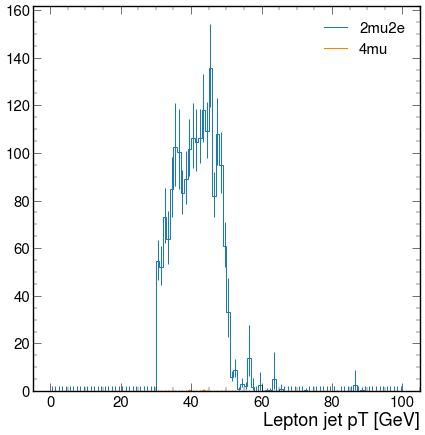

In [15]:
hep.histplot([out[sample_name]["hists"]["lj1_pt"][ch, :] for ch in channels])
plt.legend(channels)

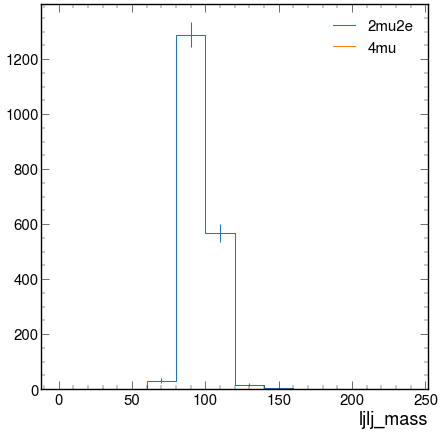

In [16]:
hep.histplot([out[sample_name]["hists"]["lj_lj_invmass"][ch, :250j] for ch in channels])
plt.legend(channels)

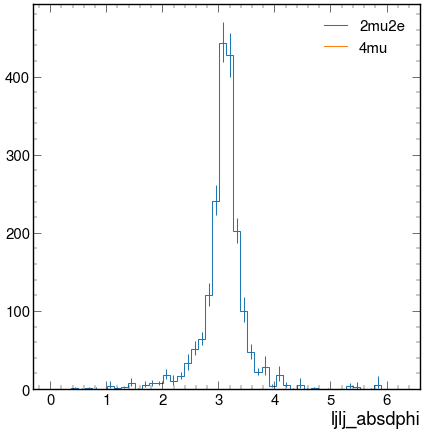

In [17]:
hep.histplot([out[sample_name]["hists"]["lj_lj_absdphi"][ch, :] for ch in channels])
plt.legend(channels)

In [18]:
out[sample_name]["hists"]["lj_lj_absdphi"].axes[0]

StrCategory(['4mu', '2mu2e'], name='channel')

In [19]:
d = {
    "pv": events["pv"],
}
a = {
    "pv": d["pv"][:1800, :],
}
a["pv"]

<Array [[{rho: 0.0433, ... normChi2: 3.16}]] type='1800 * var * {"rho": float32[...'>